In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# try:
#   !pip uninstall tb-nightly tensorboardX tensorboard
#   !pip install tf-nightly

# except Exception:
#   pass

import tensorflow as tf

import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

In [ ]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard 2.9.1
tensorboard-plugin-wit 1.8.1


In [ ]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00' , with_info =True)
train_dataset = dataset['train']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/104975 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incomplete3IYLL9/amazon_us_re…

Dataset amazon_us_reviews downloaded and prepared to ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    full_name='amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0',
    description="""
    Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promoti

In [ ]:
print(train_dataset)

<PrefetchDataset element_spec={'data': {'customer_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'helpful_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'marketplace': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_category': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_parent': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_body': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_date': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_headline': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'star_rating': TensorSpec(shape=(), dtype=tf.int32, name=None), 'total_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'verified_purchase': TensorSpec(shape=(), dtype=tf.int64, name=None), 'vine': TensorSpec(shape=(), dtype=

In [ ]:
#len(list(train_dataset))

In [ ]:
BUFFER_SIZE = 30000
BATCH_SIZE = 128

In [ ]:
#epoch depends on batch size & the speed of training can also increase
#buffer size means it will keep buffering the data while training

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [ ]:
# Data is in the form of trensors
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'17703766'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00HL3DIC6'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'648598840'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'LB1 High Performance New Wireless Bluetooth Mini Speaker for HP 2000-2b35NR Intel Core i3-2328M 15.6" Screen Display Notebook With 4GB Memory 640GB Hard Drive Windows 8 with Built-in Microphone - Micro SD card slot - Voice Prompt (Silver)'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Searched for an a10 laptop, I get about 50 pages of this same speaker. Technical specs also list it as a laptop.'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2014-11-03'>, 'review_

In [ ]:
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'Searched for an a10 laptop, I get about 50 pages of this same speaker. Technical specs also list it as a laptop.'
tf.Tensor(1, shape=(), dtype=int32)
0
b'A great, durable, and stylish phone case for my blackberry with amazing customer service by the provider of this case'
tf.Tensor(5, shape=(), dtype=int32)
1
b'I use the MP3 part only and it works great with a micro-sd card. Such loud clear sound! A little tricky to adjust the volume.'
tf.Tensor(5, shape=(), dtype=int32)
1
b'The sync cable is cheap, and I wouldn\'t expect it to withstand abuse, but it works. My girlfriend managed to break the \\\\"retractable\\\\" casing about 30 seconds after I opened it, but I just took the cable out of the plastic casing and now it\'s a normal cable (I probably would have done this anyway).<br /><br />The silicone case is very thin and effectively useless--the corner tore the same day I put it on--but the screen protector is perfectly good.<br /><br />The wall charger adapter is great - I use it w

In [ ]:
import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.Tokenizer()
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer  = tfds.deprecated.text.Tokenizer()

vocabulary_set = set()

for _, reviews in train_dataset.enumerate():
  review_text = reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

  vocab_size = len(vocabulary_set)
  vocab_size

In [ ]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [ ]:
print(vocabulary_set)

{'ambient', 'IPods', 'MPLAY', 'enveleop', 'worked', 'Induction', 'ionic', 'despacho', 'sinked', 'soundproofing', 'unreasonably', 'FreeStlye', 'hinges', '12d', 'codec', 'Cells', 'Essentially', 'Guaranteed', 'shimmy', 'changinh', 'Wordpad', 'clot', 'input', 'Quorra', 'paving', 'Range', 'humidifier', 'calif', 'Instructor', 'definitley', 'thermoelectric', 'mades', 'PLZ', 'dsa', 'dispointing', 'KMH', 'withese', 'inelegant', 'Dresuit', 'handmic', 'antes', 'kj4fgi', 'Since', 'Flasher', '13S', 'VX7R', '8192', 'hardcandy', 'stink', 'Logan', 'Scalable', 'CATCHES', 'casic', 'healthier', 'niche', 'axle', 'amputated', 'retact', 'complact', '505D', 'stared', 'Engaging', 'crowbars', 'airbus', 'flanges', 'pristine', 'Surprised', 'SG04', 'notoriety', 'AVOID', 'Wmicro', 'PRACTICAL', 'economy', 'v12bass', 'briefcases', 'Sportwagen', 'fasted', 'bathed', 'cleat', 'Blog', 'movies', 'naught', 'Bulkier', 'skitish', 'caese', 'Private', 'noesn', 'Hannah', 'ef35c2f97b873c1683e3f1e9a862654a', 'emphasizes', 'claws

In [ ]:
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b'Searched for an a10 laptop, I get about 50 pages of this same speaker. Technical specs also list it as a laptop.'
[35985, 64083, 27793, 21427, 31803, 68043, 4424, 12123, 44644, 31621, 55231, 37789, 28145, 72666, 7426, 680, 40174, 37247, 42672, 11737, 35403, 31803]
b'A great, durable, and stylish phone case for my blackberry with amazing customer service by the provider of this case'
[62711, 20180, 52865, 18391, 66735, 35069, 32000, 64083, 48478, 11822, 6924, 39414, 32082, 38849, 18986, 18864, 56991, 55231, 37789, 32000]
b'I use the MP3 part only and it works great with a micro-sd card. Such loud clear sound! A little tricky to adjust the volume.'
[68043, 37432, 18864, 56855, 13344, 65855, 18391, 42672, 19089, 20180, 6924, 35403, 37451, 65610, 47586, 52765, 13855, 40751, 33710, 62711, 63818, 23070, 62867, 53469, 18864, 3033]
b'The sync cable is cheap, and I wouldn\'t expect it to withstand abuse, but it works. My girlfriend managed to break the \\\\"retractable\\\\" casing about 30 se

In [ ]:

# Looking at the encoded values for a sample review
for index in encoded_example:
  print('{} ---> {}'.format(index, encoder.decode([index])))

72065 ---> This
20826 ---> fits
28729 ---> well
12333 ---> protects
20929 ---> your
29959 ---> unit
18391 ---> and
71119 ---> looks
51801 ---> good
15173 ---> doing
42672 ---> it
52855 ---> It
31332 ---> is
36317 ---> worth
18864 ---> the
70356 ---> price
18391 ---> and
36461 ---> in
48478 ---> my
24441 ---> opinion
46460 ---> should
16824 ---> have
6659 ---> came
6924 ---> with
18864 ---> the
29959 ---> unit
25455 ---> anyway
49254 ---> You
44433 ---> will
46436 ---> like
42672 ---> it


In [ ]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3,1,0)
  return encoded_text, label

In [ ]:
def encode_map_fn(tensor):

  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode,
                                       inp = [text, label],
                                       Tout = (tf.int64, tf.int32))

  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [ ]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [ ]:
# Looking at the encoded text and label for 5 reviews
for f1, f2 in ar_encoded_data.take(5):
  print(f1)
  print(f2)

tf.Tensor(
[35985 64083 27793 21427 31803 68043  4424 12123 44644 31621 55231 37789
 28145 72666  7426   680 40174 37247 42672 11737 35403 31803], shape=(22,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(
[62711 20180 52865 18391 66735 35069 32000 64083 48478 11822  6924 39414
 32082 38849 18986 18864 56991 55231 37789 32000], shape=(20,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[68043 37432 18864 56855 13344 65855 18391 42672 19089 20180  6924 35403
 37451 65610 47586 52765 13855 40751 33710 62711 63818 23070 62867 53469
 18864  3033], shape=(26,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[27660 42123 67936 31332 28269 18391 68043 17336 41664 48779 42672 62867
 67988  8384 18034 42672 19089 19129 15680 59981 62867 23291 18864 41261
  2425 12123 59666  8300 35853 68043 10678 42672 18034 68043  7531 47776
 18864 67936 73033 55231 18864 36419  2425 18391 25770 42672 33298 35403
 52851 67936 68043 52335 59110 16824 42228 37789 25455 27

In [ ]:
TAKE_SIZE = 20000

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

In [ ]:
vocab_size += 1

In [ ]:
sample_text, sample_labels = next(iter(test_data))
sample_text[0], sample_labels[0]

#it will print the first record till 128 batch

(<tf.Tensor: shape=(1789,), dtype=int64, numpy=array([35985, 64083, 27793, ...,     0,     0,     0])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>)

In [ ]:
for f1, f2 in test_data.take(10):
  print(tf.unique_with_counts(f2)[2].numpy())

[43 85]
[40 88]
[46 82]
[45 83]
[91 37]
[38 90]
[86 42]
[88 40]
[79 49]
[88 40]


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128)) # Alternatively glove vector
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64, 64]: # Adding 2 dense layers of 64
  model.add(tf.keras.layers.Dense(units, activation= 'relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback =  tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath= '/tmp/sentiment_analysis.hdf5',
                                                  verbose=1, save_best_only=True)

model.compile(optimizer='adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, epochs= 4, validation_data=test_data,callbacks = [tensorboard_callback, checkpointer])

Epoch 1/4
664/664 [==============================] - ETA: 0s - loss: 0.3477 - accuracy: 0.8415
Epoch 1: val_loss improved from inf to 0.27829, saving model to /tmp/sentiment_analysis.hdf5
664/664 [==============================] - 253s 295ms/step - loss: 0.3477 - accuracy: 0.8415 - val_loss: 0.2783 - val_accuracy: 0.8753
Epoch 2/4
664/664 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.9057
Epoch 2: val_loss improved from 0.27829 to 0.27004, saving model to /tmp/sentiment_analysis.hdf5
664/664 [==============================] - 240s 297ms/step - loss: 0.2288 - accuracy: 0.9057 - val_loss: 0.2700 - val_accuracy: 0.8860
Epoch 3/4
664/664 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9313
Epoch 3: val_loss did not improve from 0.27004
664/664 [==============================] - 247s 306ms/step - loss: 0.1738 - accuracy: 0.9313 - val_loss: 0.2908 - val_accuracy: 0.8877
Epoch 4/4
664/664 [==============================] - ETA: 0s - loss: 0.14

In [ ]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [ ]:
eval_loss, eval_acc = model.evaluate(test_data)
print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

157/157 [==============================] - 28s 177ms/step - loss: 0.3027 - accuracy: 0.8864

Eval loss: 0.303, Eval accuracy: 0.886


In [ ]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0], shape=(128,), dtype=int32)
4/4 [==============================] - 2s 124ms/step
[[-5.1323714 ]
 [ 6.7691207 ]
 [ 5.075627  ]
 [-1.5639067 ]
 [ 6.325302  ]
 [ 5.734474  ]
 [-4.5509996 ]
 [ 5.642344  ]
 [ 5.988108  ]
 [ 6.370058  ]
 [ 2.980465  ]
 [ 2.2728393 ]
 [ 1.6561952 ]
 [-2.3351974 ]
 [ 7.2706046 ]
 [ 4.0419784 ]
 [ 6.0004144 ]
 [-4.5606866 ]
 [ 1.6301832 ]
 [ 5.1842065 ]
 [ 6.2414265 ]
 [ 5.1905646 ]
 [-3.9000754 ]
 [-4.733236  ]
 [-6.2163258 ]
 [ 7.202725  ]
 [ 6.3289733 ]
 [ 5.161642  ]
 [ 4.628566  ]
 [ 2.0272298 ]
 [ 4.2624664 ]
 [-4.1755767 ]
 [ 4.150527  ]
 [-2.0378025 ]
 [ 4.178901  ]
 [ 3.1992583 ]
 [ 5.7984233 ]
 [ 3.132379  ]
 [-4.710886  ]
 [-5.713777  ]
 [-1.5676934 ]
 [ 5.2141967 ]
 [ 0.74062127]
 [

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         9438592   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
model.get_layer('embedding').output

<KerasTensor: shape=(None, None, 128) dtype=float32 (created by layer 'embedding')>

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel (metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

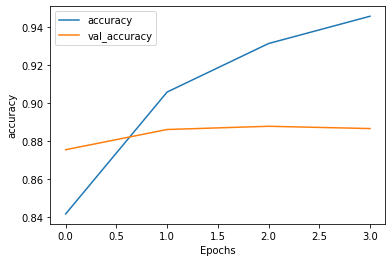

In [ ]:
plot_graphs(history, 'accuracy')

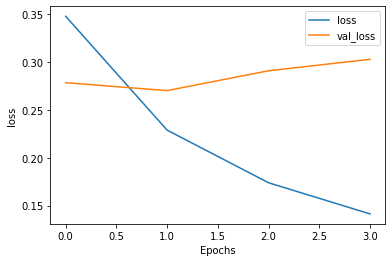

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
tf.keras.backend.clear_session()

sa_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5', compile = False)

In [ ]:
def pad_to_size(vec, size):
  zeroes = [0] * (size - len(vec))
  vec.extend(zeroes)

  return vec

In [ ]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  prediction = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
  return (prediction)

In [ ]:
pred_text = input("Enter the text: ")
predictions = predict_fn(pred_text)
if(predictions < 0):
    print("Sentiment: Negative")
if(predictions > 0):
    print("Sentiment: Positive")

print(predictions)

Enter the text: the watch is pretty bad
[18864, 69450, 31332, 14694, 37472]
[18864, 69450, 31332, 14694, 37472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1/1 [==============================] - 0s 20ms/step
Sentiment: Negative
[[-1.0822744]]


In [ ]:
#the product was good
#amazing product. fast delivery
#the watch is pretty bad
#not as expected